# UBC Bolt First Byte 2025

#### Mission:

- As audiences shift online, new technologies arise, and competing clubs expand their global footprint, Vancouver City must decide how to evolve and where to invest, in order to secure its future on and off the pitch.
- The club’s mission is to grow the game, empower fans, and strengthen connections between players, supporters, and the city it represents.

#### Context

- sales have continued to decline. Overall earnings have fallen from roughly $60 million in prior years to materially lower levels today
- The club’s three primary sources of revenue, including stadium operations, merchandise sales, and fanbase engagement, have all been impacted by these issues. Matchday turnout and in-stadium spending are falling, online sales are down by 30% compared to prior seasons, and global engagement remains underdeveloped

In [62]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## Load Data

In [2]:
merch_dat = pd.read_excel(r"data\BOLT UBC First Byte - Merchandise Sales.xlsx")
stadium_dat = pd.read_excel(r"data\BOLT UBC First Byte - Stadium Operations.xlsx")
fan_dat = pd.read_excel(r"data\BOLT UBC First Byte - Fanbase Engagement.xlsx")

In [3]:
merch_dat.sample(5)

,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date
11675,10000006,20011675,Jersey,Retro Jersey,S,152,26–40,Domestic,True,Online,2024-08-29 00:55:00,10037931,2024-09-07 12:43:00
11888,10000003,20011888,Hoodie,Training Hoodie,L,75,26–40,Domestic,True,Online,2024-05-03 06:10:00,10026419,2024-05-12 10:01:00
56070,10000006,20056070,Jersey,Retro Jersey,XXL,152,<18,International,False,Team Store,2024-07-29 09:22:00,10035035,NaT
2505,10000005,20002505,Jersey,Home Jersey,S,152,<18,Domestic,False,Online,2024-02-04 00:49:00,10006267,2024-02-13 12:31:00
42900,10000003,20042900,Hoodie,Training Hoodie,XL,75,<18,Domestic,False,Online,2024-04-02 15:24:00,10019715,2024-04-11 15:40:00


In [4]:
stadium_dat.sample(5)

,Month,Source,Revenue
24,1,Season,0
62,3,Staff,-3318000
91,8,Conference,144000
140,9,Advertising,382300
49,2,Food,2777643


In [5]:
fan_dat.sample(5)

,Membership_ID,Age_Group,Games_Attended,Seasonal_Pass,Customer_Region
14434,10039745,18-25,6,False,Canada
15269,10016264,26-40,5,False,Canada
67676,10025906,18-25,4,False,USA
42794,10032275,18-25,1,False,Canada
15039,10001362,41-60,1,False,Canada


## Summary Statistics and Basic Info

In [6]:
merch_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67877 entries, 0 to 67876
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product_ID          67877 non-null  int64         
 1   Barcode             67877 non-null  int64         
 2   Item_Category       67877 non-null  object        
 3   Item_Name           67877 non-null  object        
 4   Size                52041 non-null  object        
 5   Unit_Price          67877 non-null  int64         
 6   Customer_Age_Group  67877 non-null  object        
 7   Customer_Region     67877 non-null  object        
 8   Promotion           67877 non-null  bool          
 9   Channel             67877 non-null  object        
 10  Selling_Date        67877 non-null  datetime64[ns]
 11  Member_ID           67877 non-null  int64         
 12  Arrival_Date        54302 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(4), objec

In [7]:
stadium_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    144 non-null    int64 
 1   Source   144 non-null    object
 2   Revenue  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [8]:
fan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Membership_ID    70000 non-null  int64 
 1   Age_Group        70000 non-null  object
 2   Games_Attended   70000 non-null  int64 
 3   Seasonal_Pass    70000 non-null  bool  
 4   Customer_Region  70000 non-null  object
dtypes: bool(1), int64(2), object(2)
memory usage: 2.2+ MB


In [9]:
merch_dat.shape

(67877, 13)

In [10]:
stadium_dat.shape

(144, 3)

In [11]:
fan_dat.shape

(70000, 5)

In [12]:
merch_dat.describe()

,Product_ID,Barcode,Unit_Price,Member_ID
count,6.787700e+04,6.787700e+04,67877.000000,6.787700e+04
mean,1.000001e+07,2.003394e+07,95.129882,1.002226e+07
std,4.603017e+00,1.959455e+04,49.893563,1.284130e+04
min,1.000000e+07,2.000000e+07,20.000000,1.000000e+07
25%,1.000000e+07,2.001697e+07,50.000000,1.001115e+07
50%,1.000000e+07,2.003394e+07,75.000000,1.002229e+07
75%,1.000001e+07,2.005091e+07,152.000000,1.003338e+07
max,1.000002e+07,2.006788e+07,152.000000,1.004452e+07


In [13]:
stadium_dat.describe()

,Month,Revenue
count,144.000000,1.440000e+02
mean,6.500000,9.189942e+04
std,3.464102,1.341148e+06
min,1.000000,-3.527500e+06
25%,3.750000,-1.751925e+05
50%,6.500000,1.420000e+05
75%,9.250000,4.378755e+05
max,12.000000,3.410190e+06


In [14]:
fan_dat.describe()

,Membership_ID,Games_Attended
count,7.000000e+04,70000.000000
mean,2.464124e+07,5.711414
std,2.595011e+07,5.168150
min,1.370000e+03,1.000000
25%,1.001510e+07,3.000000
50%,1.003260e+07,5.000000
75%,3.167822e+07,7.000000
max,9.999924e+07,30.000000


### Missing Values

In [15]:
merch_dat.isna().sum()

Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Size                  15836
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
Arrival_Date          13575
dtype: int64

In [16]:
stadium_dat.isna().sum()

Month      0
Source     0
Revenue    0
dtype: int64

In [17]:
fan_dat.isna().sum()

Membership_ID      0
Age_Group          0
Games_Attended     0
Seasonal_Pass      0
Customer_Region    0
dtype: int64

### Exploring Merch Dat Missing Values

**Size Exploration**

In [18]:
merch_dat.isna().sum().sort_values(ascending=False)

Size                  15836
Arrival_Date          13575
Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
dtype: int64

In [19]:
merch_dat['Size'].value_counts(dropna=False)

NaN    15836
L      11843
M      11769
XL      7266
S       6545
YM      4398
YS      3932
XXL     3521
YL      2767
Name: Size, dtype: int64

In [20]:
# Ask how to deal with this data

#merch_dat['Size'] = merch_dat['Size'].fillna('Not Applicable') filling missing values witih unknown size

#One Hot Encoding
#merch_dat['Size'] = merch_dat['Size'].astype('category')

**Arrival Date Exploration**

In [21]:
merch_dat['Arrival_Date'].isna().mean()

0.19999410698763942

In [22]:
#sns.heatmap(merch_dat.isna(), cbar=False)
#plt.title('Missing Value Pattern – Merchandise Data')
#plt.show()

#Order by Missing Item Category (TY GPT)
merch_dat.groupby('Item_Category')['Arrival_Date'].apply(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)

Item_Category
Poster          0.212020
Mug             0.206436
Cap             0.201973
Scarf           0.200796
Youth Jersey    0.200632
Jersey          0.198645
Youth Hoodie    0.197620
Hoodie          0.197545
Name: Arrival_Date, dtype: float64

In [23]:
# Compute median arrival-to-sell lag per category
#med_lag = (merch_dat['Selling_Date'] - merch_dat['Arrival_Date']).dt.days.median()

# Fill missing arrival dates using selling date minus median lag
#merch_dat['Arrival_Date'] = merch_dat['Arrival_Date'].fillna(
#    merch_dat['Selling_Date'] - pd.to_timedelta(med_lag, unit='d')
#)

## Stadium Analysis

In [24]:
stadium_dat['Source'].value_counts()

Upper Bowl     12
Lower Bowl     12
Season         12
Premium        12
Food           12
Staff          12
Concert        12
Conference     12
Insurance      12
Maintenance    12
Utilities      12
Advertising    12
Name: Source, dtype: int64

In [25]:
# Pivot for better readability
stadium_pivot = stadium_dat.pivot_table(values='Revenue', index='Month', columns='Source', aggfunc='sum')
stadium_pivot.head()

Source,Advertising,Concert,Conference,Food,Insurance,Lower Bowl,Maintenance,Premium,Season,Staff,Upper Bowl,Utilities
Month,,,,,,,,,,,,
1,437600,450000,240000,443982,-160000,1154980,-1500000,35145,0,-2765000,25020,-269093
2,485000,0,75000,2777643,-160000,3327450,-540000,398400,527340,-3400000,686664,-220770
3,432000,0,70000,2596206,-160000,3204408,-415000,272160,535923,-3318000,434112,-221023
4,395000,0,146000,2227200,-160000,2628288,-430000,243033,478674,-3362000,390879,-235475
5,372700,285000,71000,1723476,-160000,2122992,-500000,169320,438702,-3361500,286524,-301120


### Fan Analysis

In [26]:
fan_dat.groupby(['Age_Group', 'Customer_Region']).size().sort_values(ascending=False).head(10)

# Remove impossible values
#fan = fan[(fan['Games_Attended'] >= 0) & (fan['Games_Attended'] <= 50)]

# Validate IDs
#fan_dat['Membership_ID'].nunique()  # should match len(fan)

Age_Group  Customer_Region
18-25      Canada             28163
26-40      Canada             15836
41-60      Canada              9486
<18        Canada              6393
60+        Canada              3096
18-25      USA                 2245
26-40      USA                 1252
41-60      USA                  730
<18        USA                  496
18-25      India                313
dtype: int64

### Duplicate Values

In [27]:
merch_dat.duplicated().sum()

0

In [28]:
stadium_dat.duplicated().sum()

0

In [29]:
fan_dat.duplicated().sum()

0

No Duplicate Values

## EDA

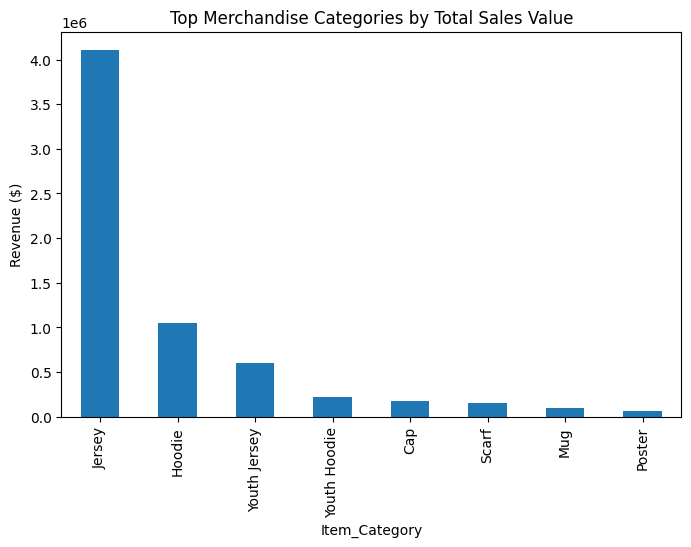

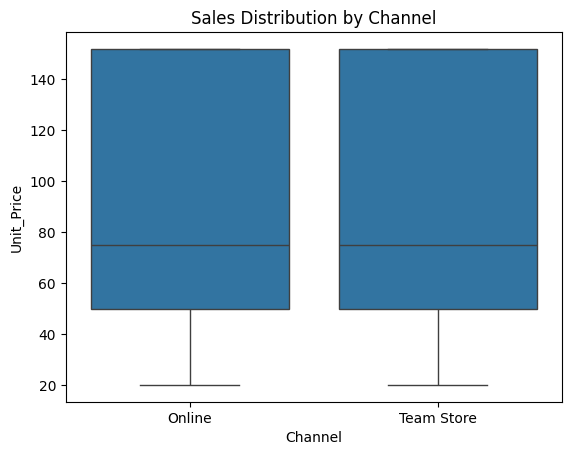

In [30]:
# Top-selling categories
plt.figure(figsize=(8,5))
merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Merchandise Categories by Total Sales Value')
plt.ylabel('Revenue ($)')
plt.show()

# Channel performance
sns.boxplot(x='Channel', y='Unit_Price', data=merch_dat)
plt.title('Sales Distribution by Channel')
plt.show()

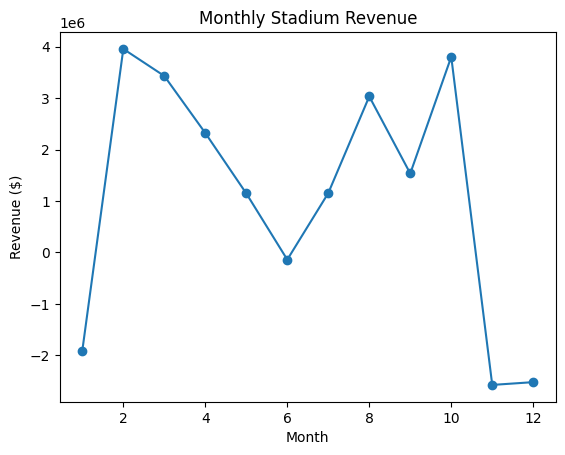

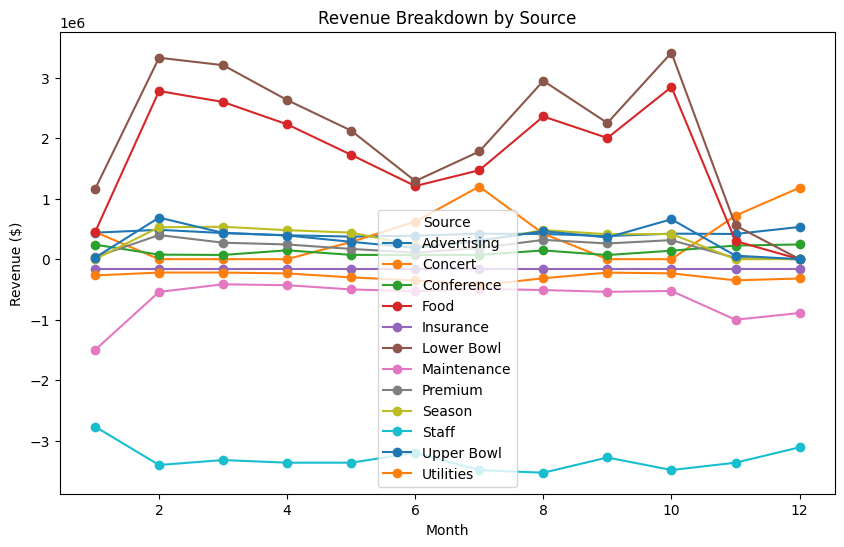

In [31]:
# Monthly revenue trend
stadium_dat.groupby('Month')['Revenue'].sum().plot(marker='o')
plt.title('Monthly Stadium Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.show()

# Compare sources (ticket, concessions, etc.)
stadium_pivot.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Revenue Breakdown by Source')
plt.ylabel('Revenue ($)')
plt.show()

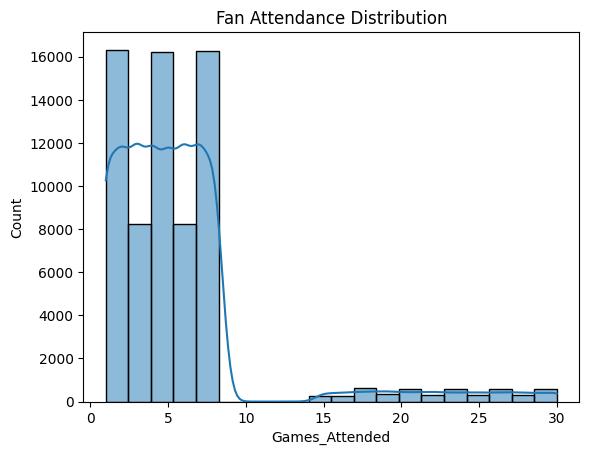

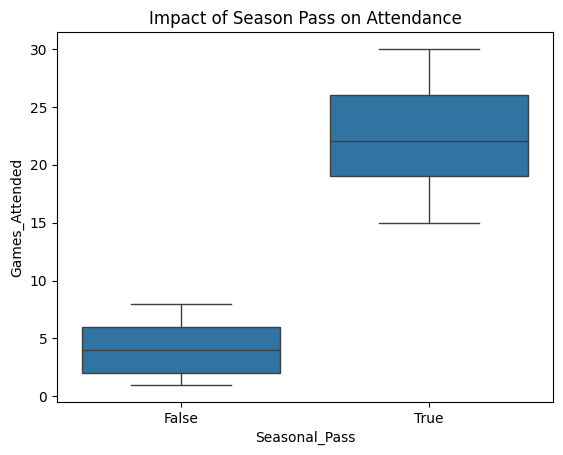

In [32]:
# Attendance distribution
sns.histplot(fan_dat['Games_Attended'], bins=20, kde=True)
plt.title('Fan Attendance Distribution')
plt.show()

# Seasonal pass effect
sns.boxplot(x='Seasonal_Pass', y='Games_Attended', data=fan_dat)
plt.title('Impact of Season Pass on Attendance')
plt.show()

### Feature Engineer

#### Merch

In [33]:
# 1. Days to Sell (only where both dates are present)
merch_dat['Days_to_Sell'] = (merch_dat['Arrival_Date']- merch_dat['Selling_Date']).dt.days
merch_dat['Days_to_Sell'] = merch_dat['Days_to_Sell'].clip(lower=0)

# 2. Discounted Item (Promotion → 0/1)
merch_dat['Discounted_Item'] = merch_dat['Promotion'].astype(int)

# 3. Revenue proxy (assuming each row = 1 sold item)
merch_dat['Revenue'] = merch_dat['Unit_Price']  # if quantity not given

# 4. Youth-size flag
merch_dat['Is_Youth_Size'] = merch_dat['Size'].str.contains('Y|Youth', case=False, na=False).astype(int)

# --- Quick check ---
merch_dat[['Unit_Price', 'Discounted_Item', 'Is_Youth_Size', 'Days_to_Sell', 'Revenue']].head()

,Unit_Price,Discounted_Item,Is_Youth_Size,Days_to_Sell,Revenue
0,35,0,0,8.0,35
1,35,0,0,NaN,35
2,35,0,0,NaN,35
3,35,1,0,7.0,35
4,35,0,0,NaN,35


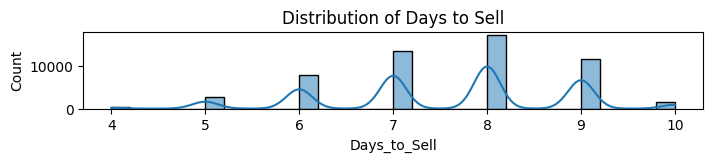

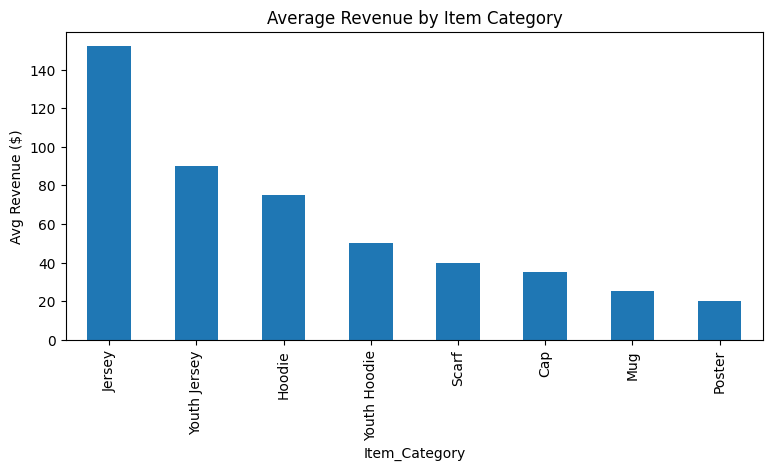

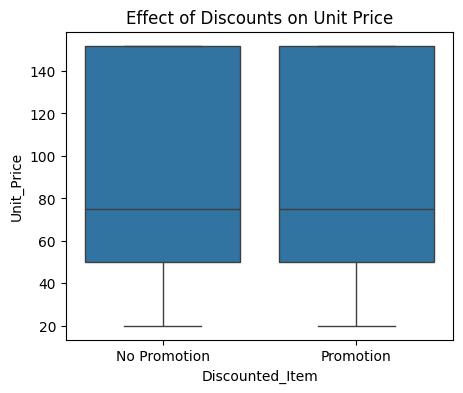

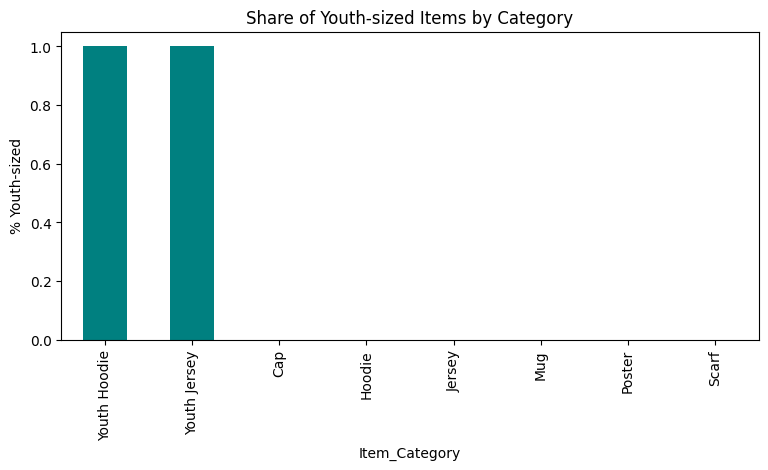

In [34]:
# Distribution of Days to Sell
plt.figure(figsize=(8,1))
sns.histplot(merch_dat['Days_to_Sell'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days to Sell')
plt.xlabel('Days_to_Sell')
plt.show()

# Average revenue by category
cat_rev = merch_dat.groupby('Item_Category')['Revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(9,4))
cat_rev.plot(kind='bar')
plt.title('Average Revenue by Item Category')
plt.ylabel('Avg Revenue ($)')
plt.show()

# Impact of Discounts
plt.figure(figsize=(5,4))
sns.boxplot(x='Discounted_Item', y='Unit_Price', data=merch_dat)
plt.title('Effect of Discounts on Unit Price')
plt.xticks([0,1], ['No Promotion','Promotion'])
plt.show()

# Youth-size share per category
youth_share = merch_dat.groupby('Item_Category')['Is_Youth_Size'].mean().sort_values(ascending=False)
youth_share.head(10).plot(kind='bar', color='teal', figsize=(9,4))
plt.title('Share of Youth-sized Items by Category')
plt.ylabel('% Youth-sized')
plt.show()

### Stadium Feature Engineering

In [35]:
stadium_dat.columns = stadium_dat.columns.str.lower()

# 1. Revenue share by source
total_rev = stadium_dat.groupby('month')['revenue'].transform('sum')
stadium_dat['Revenue_Share_%'] = (stadium_dat['revenue'] / total_rev) * 100

# 2. Month category mapping
stadium_dat['Month_Category'] = pd.cut(
    stadium_dat['month'],
    bins=[0,4,8,12],
    labels=['Preseason','Mid-season','Post-season']
)

stadium_dat.head()

,month,source,revenue,Revenue_Share_%,Month_Category
0,1,Upper Bowl,25020,-1.311757,Preseason
1,2,Upper Bowl,686664,17.354344,Preseason
2,3,Upper Bowl,434112,12.653427,Preseason
3,4,Upper Bowl,390879,16.836629,Preseason
4,5,Upper Bowl,286524,24.978249,Mid-season


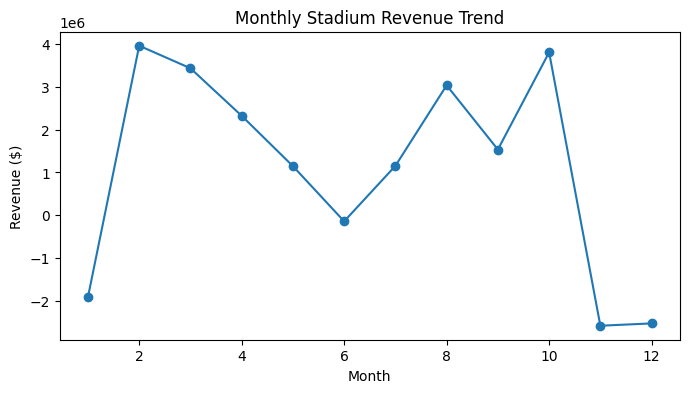

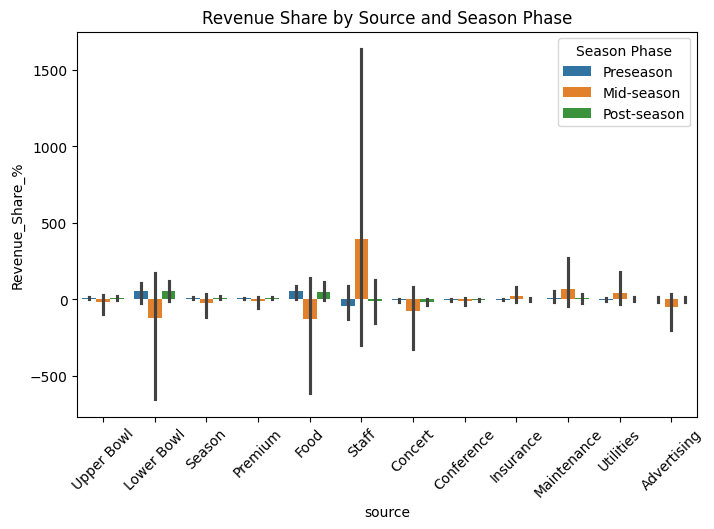

In [36]:
# Monthly total revenue trend
monthly_rev = stadium_dat.groupby('month')['revenue'].sum()
plt.figure(figsize=(8,4))
monthly_rev.plot(marker='o')
plt.title('Monthly Stadium Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.show()

# Revenue share by source category
plt.figure(figsize=(8,5))
sns.barplot(x='source', y='Revenue_Share_%', hue='Month_Category', data=stadium_dat)
plt.title('Revenue Share by Source and Season Phase')
plt.legend(title='Season Phase')
plt.xticks(rotation=45)
plt.show()

### Fan Feature Engineering

In [37]:
# Engagement_Score
fan_dat['Engagement_Score'] = (fan_dat['Games_Attended'] * 2) + (fan_dat['Seasonal_Pass'].astype(int) * 10)

# Optional: set an intended order, but allow us to remove unused levels later
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
fan_dat['Age_Group'] = pd.Categorical(fan_dat['Age_Group'], categories=age_order, ordered=True)

# Drop rows with missing Engagement_Score just in case (shouldn't be any)
fan_dat = fan_dat.dropna(subset=['Engagement_Score'])

# Compute the *present* categories actually in the data
present_age_levels = [lvl for lvl in age_order if lvl in fan_dat['Age_Group'].astype(str).unique()]

# If you want to strictly remove unused categories (helps seaborn/mpl internals)
fan_dat['Age_Group'] = fan_dat['Age_Group'].cat.remove_unused_categories()

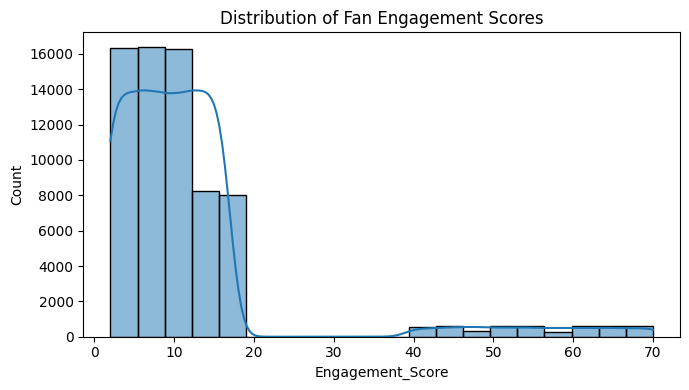

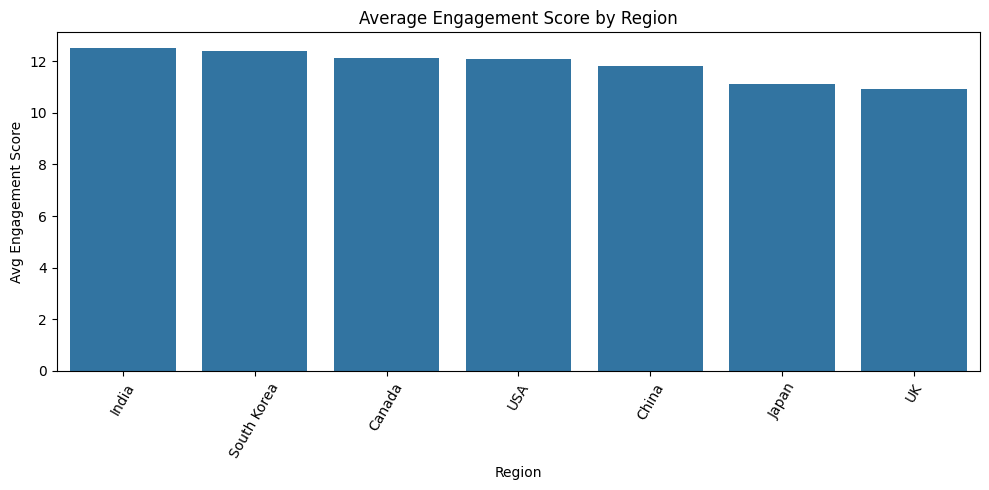

In [38]:
# 1) Engagement score distribution
plt.figure(figsize=(7,4))
sns.histplot(fan_dat['Engagement_Score'], bins=20, kde=True)
plt.title('Distribution of Fan Engagement Scores')
plt.xlabel('Engagement_Score')
plt.tight_layout()
plt.show()

# 2) Regional engagement (recompute region_summary if needed)
region_summary = (
    fan_dat.groupby('Customer_Region', as_index=False)
       .agg(Avg_Games_Attended=('Games_Attended','mean'),
            Pass_Adoption_Rate=('Seasonal_Pass','mean'),
            Avg_Engagement_Score=('Engagement_Score','mean'))
)

plt.figure(figsize=(10,5))
sns.barplot(
    x='Customer_Region',
    y='Avg_Engagement_Score',
    data=region_summary.sort_values('Avg_Engagement_Score', ascending=False)
)
plt.title('Average Engagement Score by Region')
plt.xlabel('Region')
plt.ylabel('Avg Engagement Score')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Simple Visualizations

Text(0.5, 1.0, 'Distribution of Merchandise Prices')

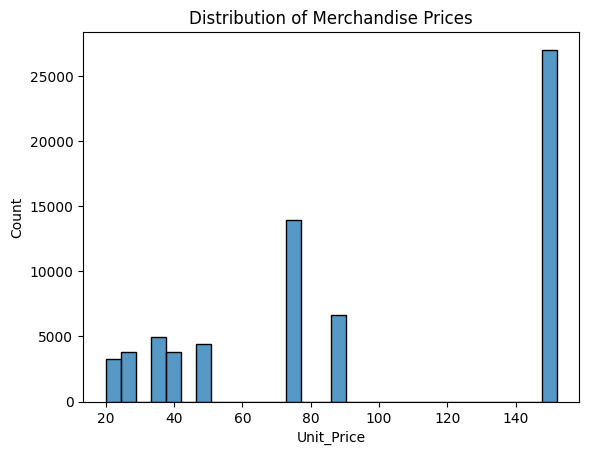

In [39]:
sns.histplot(merch_dat['Unit_Price'], bins=30)
plt.title("Distribution of Merchandise Prices")

<Axes: title={'center': 'Top-Selling Categories'}, ylabel='Item_Category'>

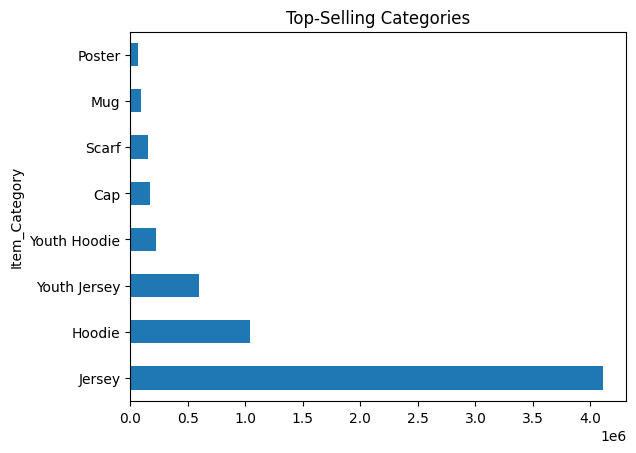

In [40]:
sales_by_cat = merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False)
sales_by_cat.head(10).plot(kind='barh', title='Top-Selling Categories')

Text(0.5, 1.0, 'Daily Sales Trend')

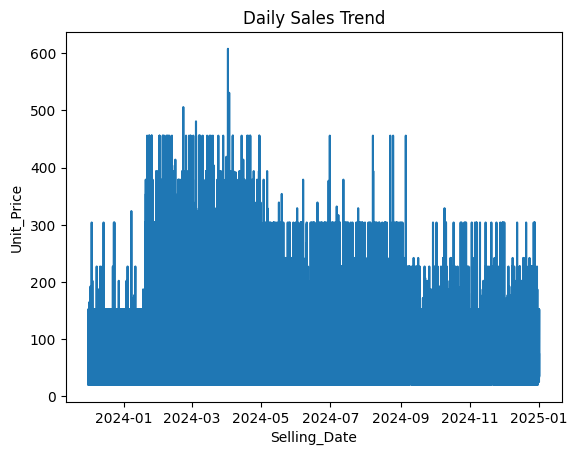

In [41]:
sales_by_day = merch_dat.groupby('Selling_Date')['Unit_Price'].sum().reset_index()
sns.lineplot(x='Selling_Date', y='Unit_Price', data=sales_by_day)
plt.title('Daily Sales Trend')

<Axes: xlabel='Promotion', ylabel='Unit_Price'>

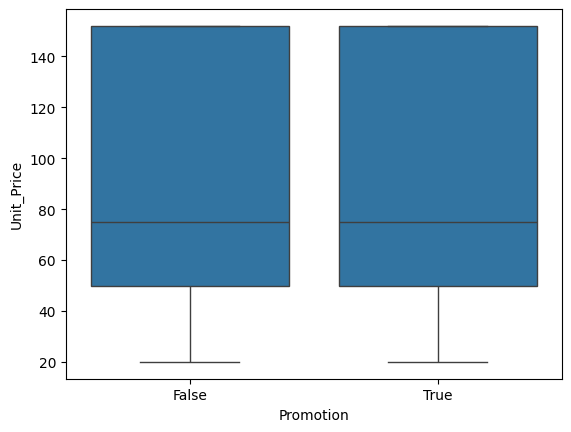

In [42]:
sns.boxplot(x='Promotion', y='Unit_Price', data=merch_dat)

<Axes: xlabel='Channel', ylabel='Unit_Price'>

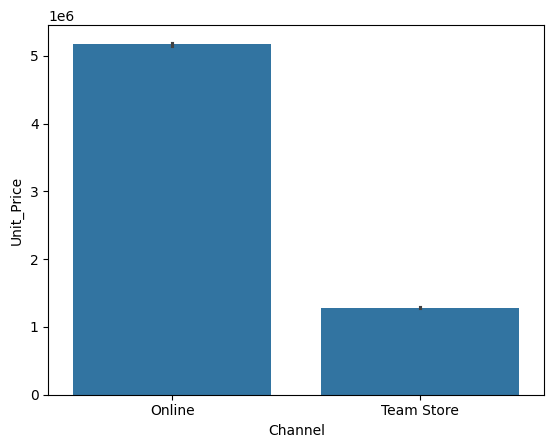

In [43]:
sns.barplot(x='Channel', y='Unit_Price', data=merch_dat, estimator='sum')

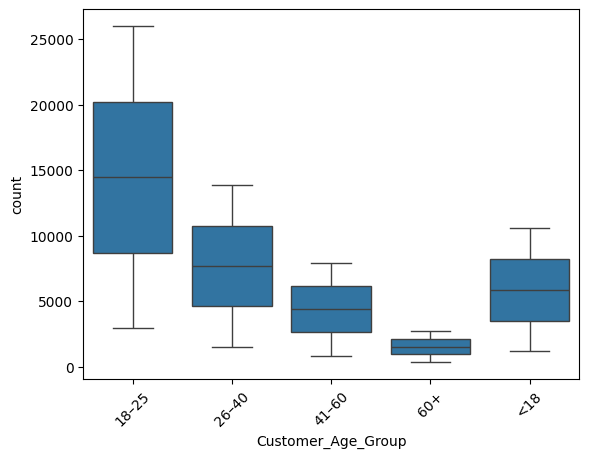

In [44]:
inconsistent_age_region = merch_dat.groupby(['Customer_Age_Group', 'Customer_Region']).size().reset_index(name='count')
# visualize unusual combos (e.g., regions with extremely low counts)
sns.boxplot(x='Customer_Age_Group', y='count', data=inconsistent_age_region)
plt.xticks(rotation=45)
plt.show()

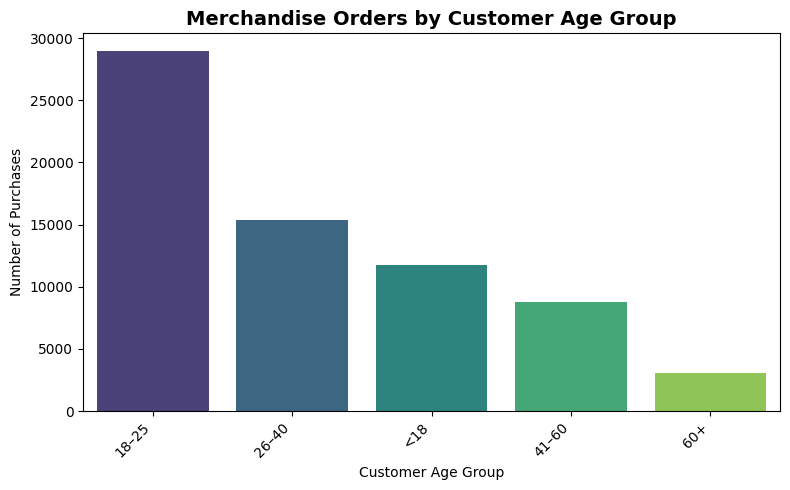

In [68]:
# Aggregate counts per age group
age_counts = merch_dat['Customer_Age_Group'].value_counts().reset_index()
age_counts.columns = ['Customer_Age_Group', 'Count']

# Plot with hue to satisfy new seaborn requirement
plt.figure(figsize=(8,5))
sns.barplot(
    x='Customer_Age_Group',
    y='Count',
    hue='Customer_Age_Group',
    data=age_counts,
    palette='viridis',
    legend=False
)

plt.title('Merchandise Orders by Customer Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [45]:
stadium_dat.sample(5)

,month,source,revenue,Revenue_Share_%,Month_Category
66,7,Staff,-3485000,-302.142568,Mid-season
26,3,Season,535923,15.620998,Preseason
6,7,Upper Bowl,307230,26.636230,Mid-season
46,11,Premium,19965,-0.774975,Post-season
21,10,Lower Bowl,3410190,89.679020,Post-season


In [53]:
stadium_dat['source'].unique()

array(['Upper Bowl', 'Lower Bowl', 'Season', 'Premium', 'Food', 'Staff',
       'Concert', 'Conference', 'Insurance', 'Maintenance', 'Utilities',
       'Advertising'], dtype=object)

In [54]:
stadium_dat['source'].value_counts()

Upper Bowl     12
Lower Bowl     12
Season         12
Premium        12
Food           12
Staff          12
Concert        12
Conference     12
Insurance      12
Maintenance    12
Utilities      12
Advertising    12
Name: source, dtype: int64

In [48]:
staff_rows = stadium_dat[stadium_dat['source'].str.contains('Staff', case=False, na=False)]
staff_rows.head()

,month,source,revenue,Revenue_Share_%,Month_Category
60,1,Staff,-2765000,144.964312,Preseason
61,2,Staff,-3400000,-85.929608,Preseason
62,3,Staff,-3318000,-96.712532,Preseason
63,4,Staff,-3362000,-144.813984,Preseason
64,5,Staff,-3361500,-293.044859,Mid-season


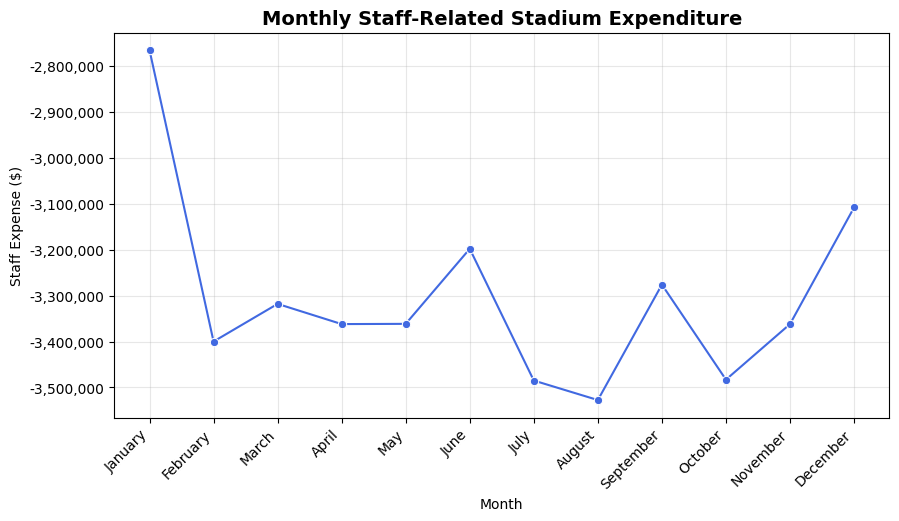

In [63]:
# Convert month number to month name
staff_summary['Month_Name'] = staff_summary['month'].apply(lambda x: calendar.month_name[x])

# Keep chronological order (1–12)
staff_summary['Month_Name'] = pd.Categorical(
    staff_summary['Month_Name'],
    categories=list(calendar.month_name)[1:],  # skips empty string at index 0
    ordered=True
)

# Sort properly by month order
staff_summary = staff_summary.sort_values('Month_Name')

# Plot
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    x='Month_Name',
    y='Staff_Expense',
    data=staff_summary,
    marker='o',
    color='royalblue'
)

plt.title('Monthly Staff-Related Stadium Expenditure', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Staff Expense ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# Format y-axis to show full numbers with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

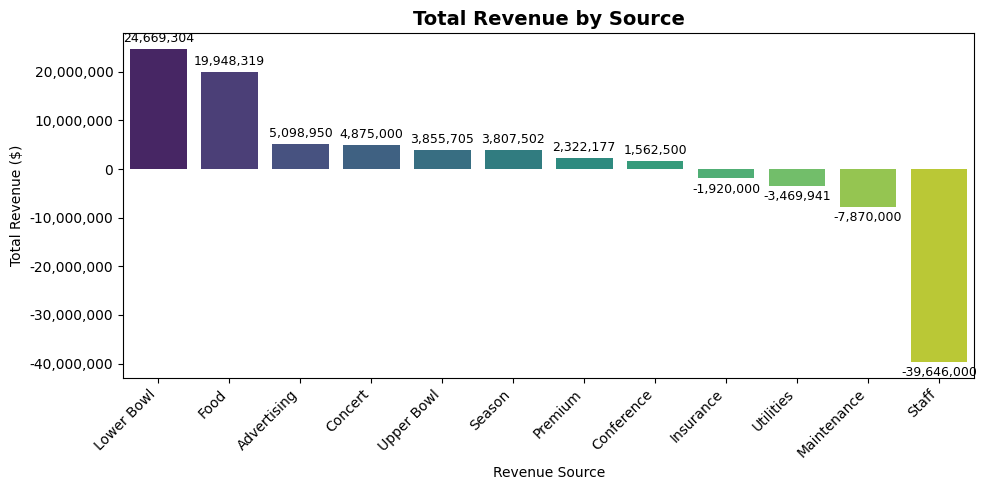

In [59]:
# Group and sum revenue by source
source_revenue = stadium_dat.groupby('source', as_index=False)['revenue'].sum()
source_revenue = source_revenue.sort_values('revenue', ascending=False)

# Plot bar chart with full numeric labels (no scientific notation)
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x='source',
    y='revenue',
    hue='source',
    data=source_revenue,
    palette='viridis',
    legend=False
)

# Titles and labels
plt.title('Total Revenue by Source', fontsize=14, fontweight='bold')
plt.xlabel('Revenue Source')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')

# Format y-axis with full numbers and commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

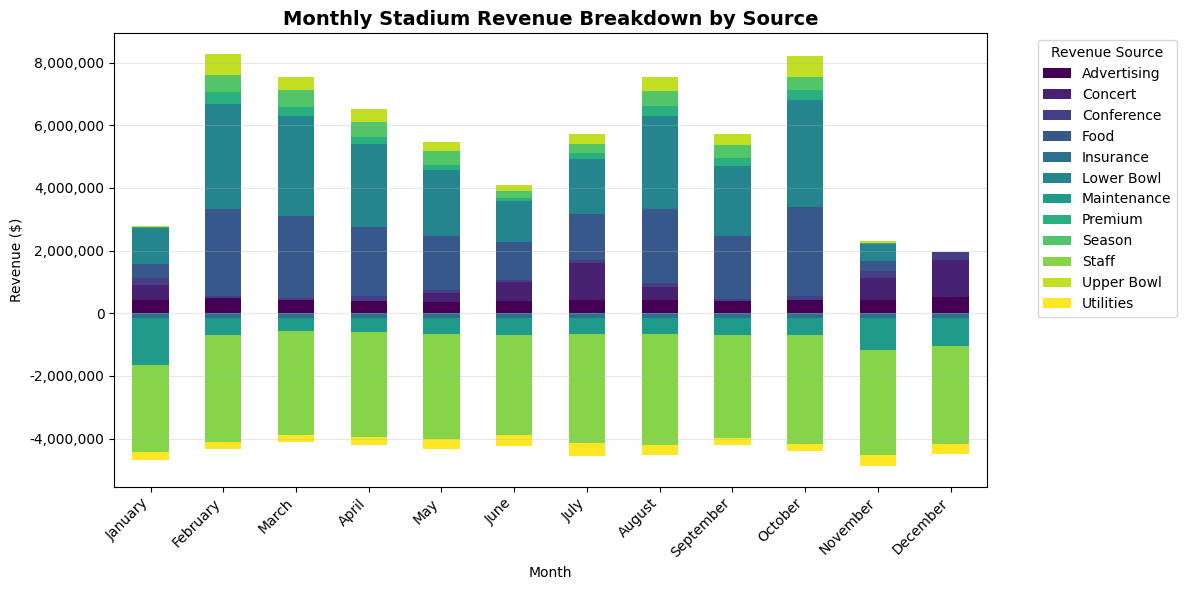

In [66]:
# ✅ 1. Prepare data
# Convert month number to month name
stadium_dat['Month_Name'] = stadium_dat['month'].apply(lambda x: calendar.month_name[x])

# Ensure correct month order
stadium_dat['Month_Name'] = pd.Categorical(
    stadium_dat['Month_Name'],
    categories=list(calendar.month_name)[1:],  # Jan–Dec
    ordered=True
)

# Pivot to wide format (one column per source)
pivot_df = stadium_dat.pivot_table(
    index='Month_Name',
    columns='source',
    values='revenue',
    aggfunc='sum'
).fillna(0)

# Sort months correctly
pivot_df = pivot_df.loc[list(calendar.month_name)[1:]]

# ✅ 2. Plot stacked bar chart
plt.figure(figsize=(12,6))
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='viridis'
)

# Customize chart
plt.title('Monthly Stadium Revenue Breakdown by Source', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Revenue Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3, axis='y')

# Format y-axis with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

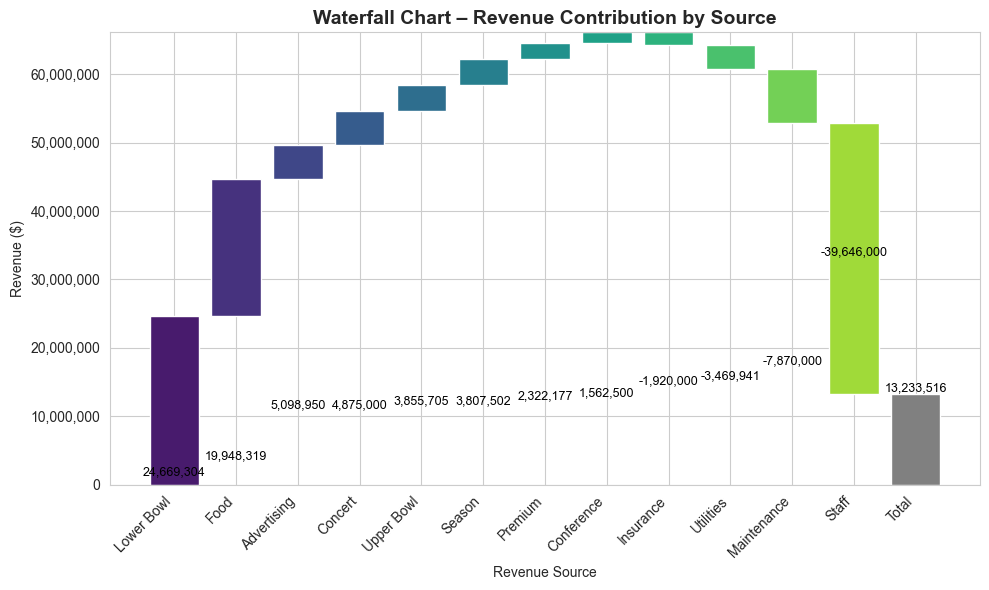

In [69]:
# ✅ 1. Base data
source_revenue = stadium_dat.groupby('source', as_index=False)['revenue'].sum()
source_revenue = source_revenue.sort_values('revenue', ascending=False).reset_index(drop=True)

# Compute cumulative sums for waterfall effect
source_revenue['Cumulative'] = source_revenue['revenue'].cumsum()
total_revenue = source_revenue['revenue'].sum()

# Add total as a final row
total_row = pd.DataFrame({'source': ['Total'], 'revenue': [total_revenue], 'Cumulative': [np.nan]})
source_revenue = pd.concat([source_revenue, total_row], ignore_index=True)

# ✅ 2. Create figure
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Track bar start positions
previous = 0
colors = sns.color_palette('viridis', n_colors=len(source_revenue))

# Plot bars one by one
for i, (src, rev) in enumerate(zip(source_revenue['source'], source_revenue['revenue'])):
    if src == 'Total':
        plt.bar(src, rev, color='grey')
    else:
        plt.bar(src, rev, bottom=previous, color=colors[i])
        previous += rev

# ✅ 3. Annotate bars
for i, (src, rev) in enumerate(zip(source_revenue['source'], source_revenue['revenue'])):
    plt.text(i, previous if src == 'Total' else previous - rev/2,
             f'{rev:,.0f}', ha='center', va='bottom', fontsize=9, color='black')

# ✅ 4. Styling
plt.title('Waterfall Chart – Revenue Contribution by Source', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)')
plt.xlabel('Revenue Source')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

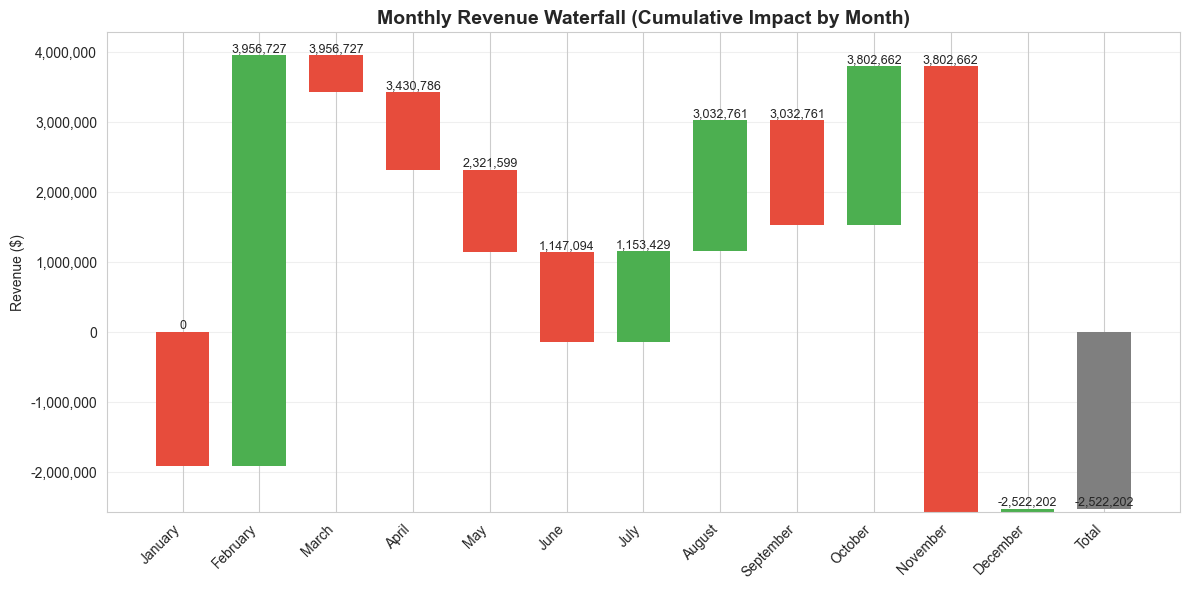

In [70]:
stadium = stadium_dat.copy()
stadium.columns = stadium.columns.str.lower()  # month, source, revenue

# Total revenue per month
monthly = (stadium.groupby('month', as_index=False)['revenue']
                  .sum()
                  .sort_values('month'))

# Month names in correct order
monthly['Month_Name'] = monthly['month'].apply(lambda x: calendar.month_name[x])
order = list(calendar.month_name)[1:]
monthly['Month_Name'] = pd.Categorical(monthly['Month_Name'], categories=order, ordered=True)
monthly = monthly.sort_values('Month_Name').reset_index(drop=True)

# --- Build waterfall components ---
# Delta vs previous month; first bar is January's level
monthly['Delta'] = monthly['revenue'].diff()
monthly.loc[0, 'Delta'] = monthly.loc[0, 'revenue']

# Running total
monthly['Running'] = monthly['Delta'].cumsum()

# Bar bottoms (start point of each waterfall bar)
bottom = []
running_prev = 0
for d in monthly['Delta']:
    if d >= 0:
        bottom.append(running_prev)
    else:
        bottom.append(running_prev + d)  # negative bar goes downward
    running_prev += d
monthly['Bottom'] = bottom

# Append a final Total bar
total_value = monthly['Running'].iloc[-1]
total_row = pd.DataFrame({
    'month': [None],
    'revenue': [total_value],
    'Month_Name': ['Total'],
    'Delta': [np.nan],
    'Running': [total_value],
    'Bottom': [0]
})
wf = pd.concat([monthly, total_row], ignore_index=True)

# --- Plot waterfall ---
plt.figure(figsize=(12,6))

# Colors: green for increases, red for decreases, gray for total
colors = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        colors.append('#7f7f7f')  # gray
    else:
        colors.append('#4CAF50' if row['Delta'] >= 0 else '#E74C3C')

# Heights: use Delta for months, Total uses final Running
heights = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        heights.append(row['Running'])
    else:
        heights.append(abs(row['Delta']))

# Bar positions / labels
x = np.arange(len(wf))
plt.bar(x, heights, bottom=wf['Bottom'], color=colors, width=0.7, edgecolor='none')

# Labels on bars
for xi, bot, h, name in zip(x, wf['Bottom'], heights, wf['Month_Name']):
    val = bot + h if name != 'Total' else h
    plt.text(xi, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Axis & styling
plt.xticks(x, wf['Month_Name'], rotation=45, ha='right')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue Waterfall (Cumulative Impact by Month)', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

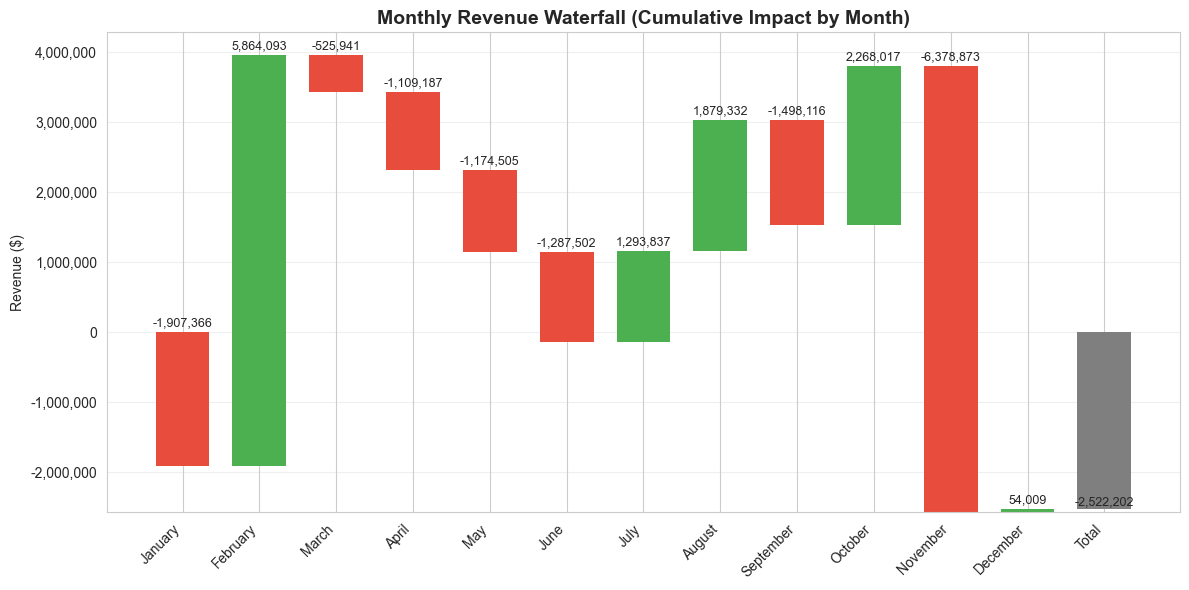

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import calendar

# --- Prep data ---
stadium = stadium_dat.copy()
stadium.columns = stadium.columns.str.lower()  # standardize
monthly = stadium.groupby('month', as_index=False)['revenue'].sum().sort_values('month')

# Month names (ordered)
monthly['Month_Name'] = monthly['month'].apply(lambda x: calendar.month_name[x])
order = list(calendar.month_name)[1:]
monthly['Month_Name'] = pd.Categorical(monthly['Month_Name'], categories=order, ordered=True)
monthly = monthly.sort_values('Month_Name').reset_index(drop=True)

# --- Build waterfall structure ---
monthly['Delta'] = monthly['revenue'].diff()
monthly.loc[0, 'Delta'] = monthly.loc[0, 'revenue']  # January base
monthly['Running'] = monthly['Delta'].cumsum()

bottom = []
running_prev = 0
for d in monthly['Delta']:
    if d >= 0:
        bottom.append(running_prev)
    else:
        bottom.append(running_prev + d)
    running_prev += d
monthly['Bottom'] = bottom

# Add final total
total_value = monthly['Running'].iloc[-1]
total_row = pd.DataFrame({
    'month': [None],
    'revenue': [total_value],
    'Month_Name': ['Total'],
    'Delta': [np.nan],
    'Running': [total_value],
    'Bottom': [0]
})
wf = pd.concat([monthly, total_row], ignore_index=True)

# --- Plot waterfall ---
plt.figure(figsize=(12,6))

colors = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        colors.append('#7f7f7f')  # gray
    else:
        colors.append('#4CAF50' if row['Delta'] >= 0 else '#E74C3C')

heights = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        heights.append(row['Running'])
    else:
        heights.append(abs(row['Delta']))

x = np.arange(len(wf))
plt.bar(x, heights, bottom=wf['Bottom'], color=colors, width=0.7, edgecolor='none')

# --- Add value labels (show negative sign for red bars) ---
for xi, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        val = row['Running']
        label = f'{val:,.0f}'
        plt.text(xi, val, label, ha='center', va='bottom', fontsize=9)
    else:
        delta = row['Delta']
        y_pos = row['Bottom'] + abs(delta) + (0.01 * wf['Running'].max())
        sign = "-" if delta < 0 else ""
        plt.text(xi, y_pos, f'{sign}{abs(delta):,.0f}', ha='center', va='bottom', fontsize=9)

# --- Styling ---
plt.xticks(x, wf['Month_Name'], rotation=45, ha='right')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue Waterfall (Cumulative Impact by Month)', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [74]:
cross = fan_dat.groupby(['Age_Group','Customer_Region']).size().reset_index(name='count')
cross = cross.sort_values('count')
cross.head(10)

,Age_Group,Customer_Region,count


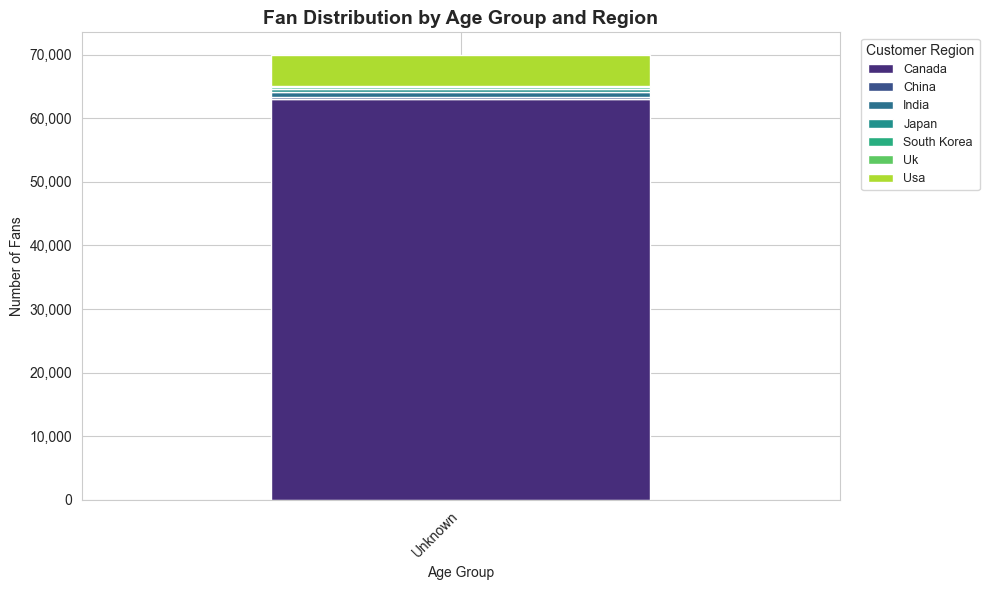

In [81]:

# 1) Clean + normalize Age_Group
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
fan = fan_dat.copy()

# Normalize strings; convert literal "nan"/"None" to real NaN; fill to "Unknown"
fan['Age_Group'] = (
    fan['Age_Group']
      .astype(str).str.strip()
      .replace({'nan': np.nan, 'None': np.nan, '': np.nan})
      .fillna('Unknown')
)

fan['Customer_Region'] = (
    fan['Customer_Region']
      .astype(str).str.strip()
      .replace({'nan': np.nan, 'None': np.nan, '': np.nan})
      .fillna('Unknown')
)

# Make Age_Group an ordered categorical so order sticks
full_age_order = age_order + ['Unknown']
fan['Age_Group'] = pd.Categorical(fan['Age_Group'], categories=full_age_order, ordered=True)

# 2) Crosstab (counts)
ct = pd.crosstab(fan['Age_Group'], fan['Customer_Region']).sort_index()  # respects categorical order
# Ensure axis labels are plain strings
ct.index = ct.index.astype(str)

# 3) Plot stacked bars
colors = sns.color_palette('viridis', n_colors=ct.shape[1])

ax = ct.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

plt.title('Fan Distribution by Age Group and Region', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Fans')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Region', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()